# CAPSTONE 1: PREDICT IF CLIENT WILL SUBSCRIBE TO A TERM DEPOSIT  

This Capstone Project seeks to explore the following concepts:
- Exploratory Data Analysis
- Data Visualisation
- Data Classification: K-means clustering
- Data Correlation
- Predictive Analysis
- Machine Learning

#### IMPORT LIBRARIES AND INSPECT DATA

In [411]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from random import sample
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [412]:
# Import test and train data
# convert file to dataframe
# Inspect dataframe

train = pd.read_csv(r"C:\Users\fkole\Desktop\Kemi_Drive\Other_springboard\Capstone_1_project\bank-additional-full.csv", sep=';')
test = pd.read_csv(r"C:\Users\fkole\Desktop\Kemi_Drive\Other_springboard\Capstone_1_project\bank-additional.csv", sep=';')

print(train.shape)

(41188, 21)


#### DATA WRANGLING

In [413]:
# Data Cleaning: Drop Duplicates
train = train.drop_duplicates()
train.shape

(41176, 21)

In [414]:
# Convert all variables of the type “object” into categorical variables
# Select categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

#Loop through the columns and change datatype to 'category'
for column in categorical_columns:
    train[column] = train[column].astype('category')

In [415]:
# View summary statistics

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null category
marital           41176 non-null category
education         41176 non-null category
default           41176 non-null category
housing           41176 non-null category
loan              41176 non-null category
contact           41176 non-null category
month             41176 non-null category
day_of_week       41176 non-null category
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null category
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null category
dtypes: category(11), float64

In [416]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [417]:
# Use Describe function to get summary statistics of data. 
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [418]:
# Examine the first 5 columns of the dataset
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [419]:
# Examine the last 5 columns of the dataset
train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [420]:
#Create a random index
randomIndex = np.array(sample(range(len(train)),5))
# Get 5 random rows
trainSample = train.loc[randomIndex]

# Print the sample
trainSample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28119,38,entrepreneur,married,professional.course,no,yes,yes,cellular,apr,mon,...,2,999,1,failure,-1.8,93.075,-47.1,1.466,5099.1,no
17759,60,retired,divorced,high.school,unknown,yes,yes,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
14607,38,admin.,single,high.school,no,no,yes,telephone,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
17343,51,technician,married,basic.9y,unknown,yes,yes,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
15972,30,management,single,university.degree,no,no,yes,telephone,jul,mon,...,11,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


In [421]:
#Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [422]:
# Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 


In [423]:
# Data Cleaning: Identify outliers using Z-Score
z_columns = train.loc[:,['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [424]:
z = np.abs(stats.zscore(z_columns))
print(z)

[[1.53314313 0.01035157 0.56596326 ... 0.88656813 0.71246263 0.33169507]
 [1.62910732 0.42157694 0.56596326 ... 0.88656813 0.71246263 0.33169507]
 [0.29017656 0.12462609 0.56596326 ... 0.88656813 0.71246263 0.33169507]
 ...
 [1.53314313 0.26731675 0.20498953 ... 2.22505906 1.49519696 2.81568858]
 [0.3815728  0.70837889 0.56596326 ... 2.22505906 1.49519696 2.81568858]
 [3.26049862 0.07449153 0.1559842  ... 2.22505906 1.49519696 2.81568858]]


In [425]:
Q1 = z_columns.quantile(0.25)
Q3 = z_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [426]:
print(z_columns < (Q1 - 1.5 * IQR)) , (z_columns > (Q3 + 1.5 * IQR))

         age  duration  campaign  pdays  previous  emp.var.rate  \
0      False     False     False  False     False         False   
1      False     False     False  False     False         False   
2      False     False     False  False     False         False   
3      False     False     False  False     False         False   
4      False     False     False  False     False         False   
5      False     False     False  False     False         False   
6      False     False     False  False     False         False   
7      False     False     False  False     False         False   
8      False     False     False  False     False         False   
9      False     False     False  False     False         False   
10     False     False     False  False     False         False   
11     False     False     False  False     False         False   
12     False     False     False  False     False         False   
13     False     False     False  False     False         Fals

(None,          age  duration  campaign  pdays  previous  emp.var.rate  \
 0      False     False     False  False     False         False   
 1      False     False     False  False     False         False   
 2      False     False     False  False     False         False   
 3      False     False     False  False     False         False   
 4      False     False     False  False     False         False   
 5      False     False     False  False     False         False   
 6      False     False     False  False     False         False   
 7      False     False     False  False     False         False   
 8      False     False     False  False     False         False   
 9      False     False     False  False     False         False   
 10     False     False     False  False     False         False   
 11     False     False     False  False     False         False   
 12     False     False     False  False     False         False   
 13     False     False     False  False  

In [450]:
#Frequency count
train.job.value_counts(dropna=False).head()


admin.         10419
blue-collar     9253
technician      6739
services        3967
management      2924
Name: job, dtype: int64

In [456]:
#Frequency count
train.marital.value_counts(dropna=False)

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [457]:
print(str(train.marital.value_counts(dropna=False).unknown/train.marital.count()*100) +  " %")

0.19428793471925393 %


In [458]:
#Frequency count
train.education.value_counts(dropna=False)

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [459]:
print(str(train.education.value_counts(dropna=False).unknown/train.education.count()*100) +  " %")

4.2014765883038665 %


In [460]:
#Frequency count
train.default.value_counts(dropna=False)

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [461]:
print(str(train.default.value_counts(dropna=False).unknown/train.default.count()*100) +  " %")

20.876238585583835 %


In [462]:
#Frequency count
train.housing.value_counts(dropna=False)

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [463]:
print(str(train.housing.value_counts(dropna=False).unknown/train.housing.count()*100) +  " %")

2.4043131921507674 %


In [464]:
#Frequency count
train.loan.value_counts(dropna=False)

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [465]:
print(str(train.loan.value_counts(dropna=False).unknown/train.loan.count()*100) +  " %")

2.4043131921507674 %


In [466]:
#Frequency count
train.contact.value_counts(dropna=False)

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [467]:
#Frequency count
train.poutcome.value_counts(dropna=False)

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [468]:
print(str(train.poutcome.value_counts(dropna=False).nonexistent/train.poutcome.count()*100) +  " %")

86.33912959005245 %


In [469]:
#Frequency count
train.y.value_counts(dropna=False)

no     36537
yes     4639
Name: y, dtype: int64

In [470]:
#Frequency count
train.month.value_counts(dropna=False)

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [471]:
#Frequency count
train.day_of_week.value_counts(dropna=False)

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [472]:
#Frequency count
train.poutcome.value_counts(dropna=False)

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [473]:
#Frequency count
train.y.value_counts(dropna=False)

no     36537
yes     4639
Name: y, dtype: int64

#### EXPLORATORY DATA ANALYSIS AND DATA VISUALISATION

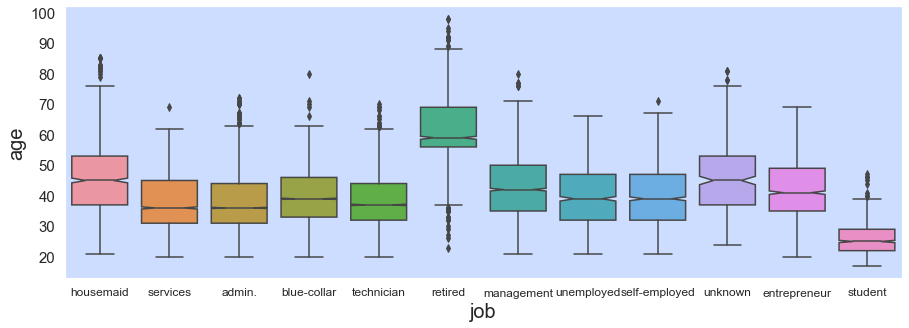

In [270]:
sns.set(rc={"axes.facecolor":"#ccddff", "axes.grid":False, 'axes.labelsize':20, 'figure.figsize':(15.0, 5), 'xtick.labelsize':12,
            'ytick.labelsize':15})
age_job_box = sns.boxplot(data=train, x='job', y='age', notch=True)

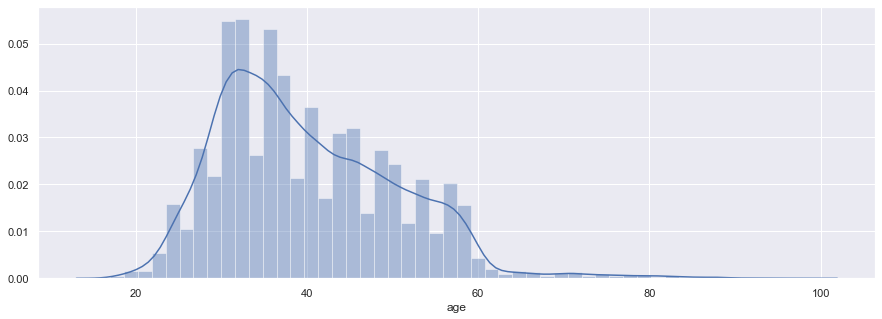

In [271]:
>>> sns.set()
>>> ax = sns.distplot(train.age)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


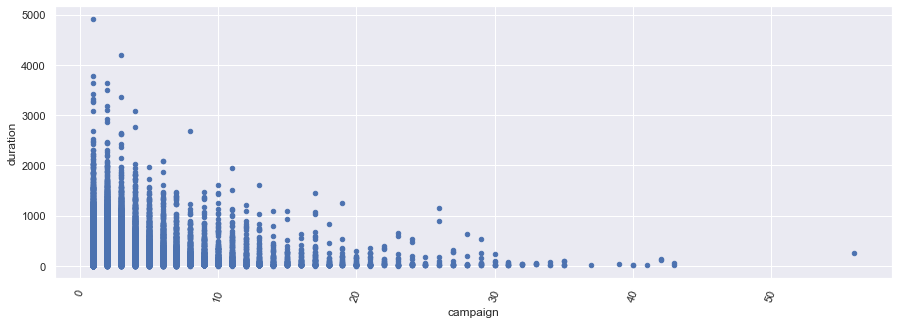

In [272]:
train.plot(kind='scatter', x='campaign', y='duration', rot=70)
plt.show()

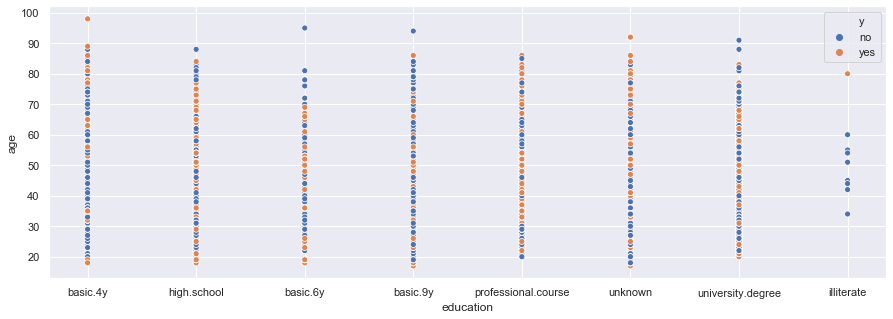

In [273]:
age_job_box = sns.scatterplot(x='education', y='age', hue="y", data=train)                                      